In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

# Load Dataset

In [6]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [7]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [9]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

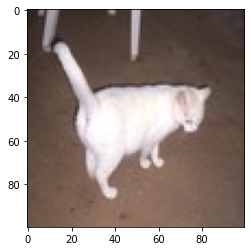

In [10]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [11]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

# Another way of defining the model

''' model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation = 'relu')
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) '''

In [12]:
model.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])

In [17]:
model.fit(X_train,Y_train, epochs =5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 13s 398ms/step - loss: 0.1955 - accuracy: 0.9255
Epoch 2/5
32/32 [==============================] - 13s 395ms/step - loss: 0.1663 - accuracy: 0.9430
Epoch 3/5
32/32 [==============================] - 13s 398ms/step - loss: 0.1133 - accuracy: 0.9675
Epoch 4/5
32/32 [==============================] - 13s 399ms/step - loss: 0.0938 - accuracy: 0.9750
Epoch 5/5
32/32 [==============================] - 13s 400ms/step - loss: 0.0706 - accuracy: 0.9850


In [18]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 55ms/step - loss: 0.9901 - accuracy: 0.6700


[0.9901204109191895, 0.6700000166893005]

# Making Predictions


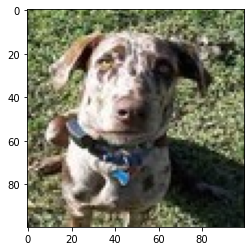

1/1 [==============================] - 0s 61ms/step
The predicted value is:  dog


In [19]:
idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred>0.5

if(y_pred==0):
    pred='dog'
else:
    pred='cat'
print('The predicted value is: ',pred)